In [1]:
pip install graphviz

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing all the necessary libraries
pip install seaborn

SyntaxError: invalid syntax (3320287223.py, line 2)

In [4]:
#from sklearn.datasets import fetch_mldata
import seaborn as sns
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import graphviz 
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb
from sklearn.decomposition import PCA

In [5]:
#%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split



In [6]:

#data_set = r"C:\Users\A\Desktop\neural networks\WESAD-data\S2"

s2_path = r"C:\Users\pc\S2.pkl"
#s2_path = data_set + 'S2/S2.pkl'

with open(s2_path, 'rb') as file:
  s2_data = pickle.load(file, encoding='latin1')



In [7]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from google.colab import files
files.upload()

In [8]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Done")

Done


In [9]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")



data frame combined


In [10]:
display(df.shape)
display(df.info)
display(df.describe)

(4255300, 9)

<bound method DataFrame.info of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
...         ...     ...     ...       ...       ...       ...        ...   
4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   

           c_resp  w_label  
0       -1.148987      0.0

<bound method NDFrame.describe of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
...         ...     ...     ...       ...       ...       ...        ...   
4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   

           c_resp  w_label  
0       -1.148987      0

In [11]:
# Calculating the interquartile range

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_label    2.000000
dtype: float64


In [13]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)


(2100456, 9)


In [14]:
#mean normalization 
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)


norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)


In [15]:
norm_df_out.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
393691,-1.678430,2.251221,-1.593856,-0.326259,-0.675595,3.563482,-4.750996,-0.416753,-0.108962
394476,-1.697992,2.116280,-1.564093,-1.913346,-1.408406,3.553901,-4.753546,0.864869,-0.108962
395154,-1.710440,2.244120,-1.574550,0.843406,1.302484,3.587000,-4.748553,-0.731728,-0.108962
396635,-1.746005,1.952928,-1.606727,-1.452419,0.221203,3.586129,-4.753546,1.121464,-0.108962
402178,-1.712218,2.158892,-1.596269,0.766310,-0.537232,3.553901,-4.571494,0.949722,-0.108962


In [16]:
norm_df_out.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06
mean,1.682200e-16,6.227062e-17,-1.660144e-16,6.819729e-18,-1.407246e-17,-3.169550e-16,-2.865856e-15,-1.104147e-17,4.483701e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.534372e+00,-3.814046e+00,-2.495604e+00,-2.629794e+00,-2.776663e+00,-1.856971e+00,-4.756042e+00,-2.715254e+00,-7.712019e-01
25%,-1.750292e-02,-6.535731e-01,-4.483708e-01,-5.757211e-01,-6.448473e-01,-7.211407e-01,-6.176719e-01,-7.154357e-01,-7.712019e-01
50%,4.164009e-01,-8.539912e-02,1.235676e-01,2.470093e-01,6.234153e-02,-1.995722e-02,-1.520821e-01,-1.092451e-01,-7.712019e-01
75%,6.226834e-01,5.537980e-01,5.812790e-01,6.049576e-01,6.619147e-01,3.711377e-01,7.266278e-01,7.331766e-01,5.532788e-01
max,4.150819e+00,3.856315e+00,3.420860e+00,2.775776e+00,2.732236e+00,3.596582e+00,3.874975e+00,2.802235e+00,1.877759e+00


In [17]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100456 entries, 393691 to 4255299
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 160.3 MB


In [18]:
norm_df_out.shape

(2100456, 9)

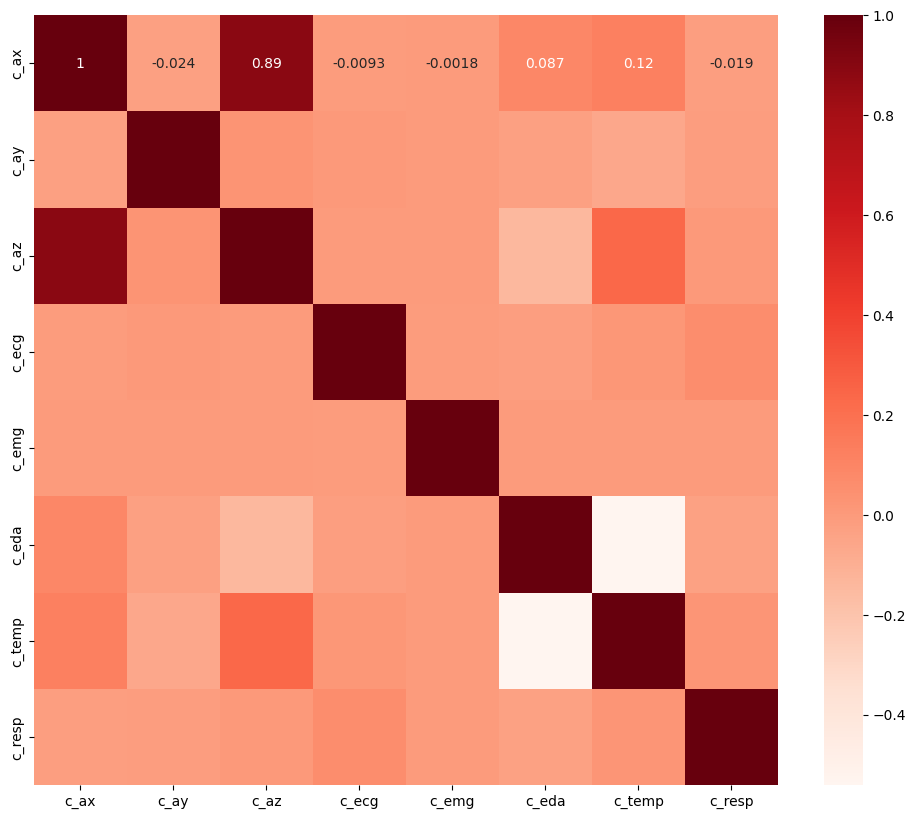

In [19]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:

X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.000000e+00
c_ax      0.000000e+00
c_ay      0.000000e+00
c_az      0.000000e+00
c_ecg     7.723874e-02
c_emg     3.922825e-33
c_eda     0.000000e+00
c_temp    0.000000e+00
c_resp    0.000000e+00
dtype: float64

In [21]:
 pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [22]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(QuadraticDiscriminantAnalysis(),
           k_features=7,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(norm_x, norm_y)
sfs.k_feature_names_     # to get the final set of features

('c_ay', 'c_az', 'c_ecg', 'c_emg', 'c_eda', 'c_temp', 'c_resp')

In [23]:
sfs = SFS(QuadraticDiscriminantAnalysis(),
           k_features=7,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(norm_x, norm_y)
sfs.k_feature_names_     # to get the final set of features

('c_ay', 'c_az', 'c_ecg', 'c_emg', 'c_eda', 'c_temp', 'c_resp')

In [24]:
norm_x_train

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3525332,0.603122,-0.866640,0.508882,0.448562,-0.573104,-0.813470,1.636671,1.452731
3481659,0.734715,-0.809822,0.997965,0.399550,0.123836,-0.863119,1.180906,-0.722224
3181103,0.683145,-0.397894,0.573235,-0.994245,0.866897,-0.763821,-0.167430,2.138344
1662101,0.466193,-0.966070,0.190334,0.006358,0.790029,0.414689,-0.433603,-0.001312
2759155,0.700928,0.717148,0.803297,1.368764,-1.024065,-0.371856,1.266302,-0.194098
...,...,...,...,...,...,...,...,...
3655545,0.580004,1.803783,0.286864,-0.193542,-0.660221,-1.074781,0.974266,2.141059
1496772,0.505316,0.589308,0.256296,-2.108291,-0.839580,0.040144,-1.458198,-0.954382
2106682,0.327486,0.227098,-0.118561,0.575771,-1.080435,2.594891,-1.531857,0.837716
2915782,-2.005637,0.319425,-1.749912,0.057021,0.964264,-0.389276,-0.203330,-0.506358


In [25]:
norm_y_train

3525332    3.0
3481659    3.0
3181103    0.0
1662101    2.0
2759155    0.0
          ... 
3655545    0.0
1496772    0.0
2106682    0.0
2915782    4.0
1312511    0.0
Name: w_label, Length: 1680364, dtype: float64

In [26]:
norm_x_test

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
2086152,0.281250,0.198689,-0.067078,0.770715,-0.547481,3.366628,-1.722193,0.202336
2951073,-2.144343,0.184484,-1.791742,-1.743734,-0.603851,-0.406697,-0.149533,0.621849
2751906,0.821853,0.624821,0.838692,-0.116997,-0.117018,-0.347467,1.134437,-0.158120
2303026,-0.773279,-0.312669,-1.062138,-0.849414,1.148748,0.499180,0.209577,-0.243652
3611979,0.580004,2.514001,0.284450,-0.176471,-0.163139,-1.168853,1.844266,-1.783906
...,...,...,...,...,...,...,...,...
1077921,0.114090,0.227098,-0.350232,-2.392997,1.363979,0.186478,-0.737588,-0.406570
1805210,0.341713,-0.362384,0.087369,-1.496474,-1.167552,0.986960,-0.528240,-0.695071
1606293,0.423514,0.994135,0.129199,1.915048,0.728534,0.308423,-0.126431,0.081505
1329682,0.281250,-0.717493,-0.071905,0.151189,1.922556,0.000948,-0.798873,0.467756


In [27]:
norm_y_test

2086152    0.0
2951073    4.0
2751906    0.0
2303026    0.0
3611979    0.0
          ... 
1077921    0.0
1805210    2.0
1606293    2.0
1329682    0.0
3577450    3.0
Name: w_label, Length: 420092, dtype: float64

In [28]:

y=df_out.w_label
x=df_out.drop('w_label',axis=1)
#print(x)
#print("\n-----\n")
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y

393691     1.0
394476     1.0
395154     1.0
396635     1.0
402178     1.0
          ... 
4255293    0.0
4255295    0.0
4255296    0.0
4255297    0.0
4255299    0.0
Name: w_label, Length: 2100456, dtype: float64

In [29]:
(x_train)


,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
4175630,0.9002,-0.1222,0.1434,0.012405,-0.003479,0.510025,32.217224,1.756287
3369671,0.9094,-0.1512,-0.0718,-0.113251,0.002518,0.762558,31.844757,2.369690
4200772,0.8706,-0.1182,-0.2014,0.122360,0.018494,0.394440,31.906952,3.144836
1826088,0.8740,-0.1108,-0.2870,-0.008194,0.003616,1.475143,31.075409,-2.174377
1490586,0.8910,-0.1288,-0.2274,0.058273,-0.005035,1.147079,30.672791,2.639771
...,...,...,...,...,...,...,...,...
3187136,0.9006,-0.1386,-0.1846,-0.045364,-0.016617,0.767136,31.404694,2.537537
1726730,0.8904,-0.1514,-0.2518,0.040100,-0.005173,1.466751,31.392914,0.067139
1448173,0.8878,-0.0898,-0.2594,-0.157654,0.004166,1.129532,30.664001,-0.032043
1026304,0.8078,-0.1220,-0.4732,-0.035202,-0.014511,1.255417,29.499786,1.383972


In [30]:

(y_train)


4175630    0.0
3369671    3.0
4200772    0.0
1826088    2.0
1490586    0.0
          ... 
3187136    0.0
1726730    2.0
1448173    0.0
1026304    0.0
4202264    0.0
Name: w_label, Length: 1680364, dtype: float64

In [31]:
(x_test)


,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3600281,0.9038,-0.1000,-0.1996,0.004257,0.002426,0.569534,32.830811,3.160095
3779150,0.9088,-0.1042,0.0814,0.098373,-0.001877,0.744247,31.889160,3.675842
3810312,0.9114,-0.1222,0.0054,0.081619,-0.000916,0.662994,31.868469,-0.477600
2724187,0.8872,-0.1350,-0.2182,0.042343,-0.019455,1.004791,32.123596,-3.837585
3763914,0.9162,-0.1010,0.0616,-0.022751,-0.013275,0.714111,31.945496,-0.601196
...,...,...,...,...,...,...,...,...
2184180,0.8638,-0.1086,-0.3294,-0.183609,-0.005264,1.665878,30.729767,-2.050781
2771047,0.8888,-0.1350,-0.1568,-0.054474,-0.016525,0.911713,32.285675,3.045654
4159380,0.9026,-0.1006,0.1538,0.012131,0.021561,0.522614,32.123596,-0.434875
2376902,0.8954,-0.1110,-0.3074,0.193130,-0.016800,1.546478,30.551605,0.193787


In [32]:
(y_test)


3600281    0.0
3779150    0.0
3810312    0.0
2724187    0.0
3763914    0.0
          ... 
2184180    0.0
2771047    0.0
4159380    0.0
2376902    0.0
3492496    3.0
Name: w_label, Length: 420092, dtype: float64

In [33]:
import tensorflow as tf

C:\Users\pc\.conda\envs\wesad\lib\site-packages\tensorflow\python\framework\dtypes.py:585: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
pip uninstall numpy

# Logistic Regression Base Model

In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg',penalty='none')
clf.fit(x_train,y_train)
y_out = clf.predict(x_test)
print(classification_report(y_test, y_out, digits=4))

'''
(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=3,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) or use slover=saga
'''                 

# Logistic Regression + L2 regularization

In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg',penalty='l2',multi_class='auto')
clf.fit(x_train,y_train)
y_out = clf.predict(x_test)
print(classification_report(y_test, y_out, digits=4))



In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg',penalty='l2',multi_class='auto')
y_out = cross_val_predict(clf, norm_x, norm_y, cv=5)
print(classification_report(norm_y_test, y_out, digits=4))



# LDA Basic Implementation

In [ ]:
LDA= LinearDiscriminantAnalysis(solver = 'svd')
y_out = LDA.fit(x_train, y_train).predict(x_test)
#confusion_matrix(y_test, y_out)
print(classification_report(y_test, y_out, digits=4))#target_names=['Not Six', 'Six']

# LDA + Normalization + n_components &  5 Cross Validation

In [ ]:
LDA= LinearDiscriminantAnalysis(solver = 'svd')
#norm_y_out = LDA.fit(norm_x_train, norm_y_train).predict(norm_x_test)
norm_y_out = cross_val_predict(LDA, norm_x, norm_y, cv=5)
print(classification_report(norm_y_test, norm_y_out, digits=4))

# QDA Basic Implementation

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(x_train,y_train)
y_out = qda_clf.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_out, digits=4))#target_names=['Not Six', 'Six']
#IF QDA is best, then data must be Gaussian

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis()
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=5)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# QDA + Normalization + Cross Validation = 10

# BEST MODEL *****++++****

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)
'''
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
'''    

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.5)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.9)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.7)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# QDA + Normalization + Cross Validation = 20

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis()
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

In [ ]:
'''
lm=(classification_report(y, y_out, digits=4))
print(lm)
scores = cross_val_score(qda_clf, x, y, cv=10, scoring='accuracy').mean()
print(scores)

#scoring='mean_squared_error'
'''

In [ ]:
'''
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

y_out = cross_val_predict(qda_clf, x, y, cv=loo)
lm=(classification_report(y, y_out, digits=4))
lm=(classification_report(y, y_out, digits=4))
print(lm)
'''

# KNN + Cross Validation + K=3 + Normalization [ CV = 10, K = 3 ]

In [ ]:
#Do base mdel with test and train data, show improvement in next section with cross validation
knn = KNeighborsClassifier(n_neighbors=3)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)
#https://www.ritchieng.com/machine-learning-cross-validation/

# KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# KNN + Cross Validation + K=10 + Normalization [ CV = 10, K = 10 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# KNN + Cross Validation [ CV = 10, K = 20 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# KNN + Cross Validation [ CV = 10, K = 30 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# KNN + Cross Validation [ CV = 10, K = 40 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=40)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# KNN + Cross Validation [ CV = 10, K = 60 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=60)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# KNN + Cross Validation [ CV = 10, K = 100 ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# Simple Decision Tree + Depth = 5

In [ ]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

clf_i = clf.fit(x_train,y_train)

y_out_i = clf_i.predict(x_test)

lm_i=(classification_report(y_test, y_out_i, digits=4))
print(lm_i)

 

# Displaying and Drwaing the Tree

In [ ]:
tree.plot_tree(clf_i) 

In [ ]:
#from sklearn import tree
#https://scikit-learn.org/stable/modules/tree.html

features_ax=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp"]
classes_ay=['0', '1', '2', '3', '4']

dot_data = tree.export_graphviz(clf_i, out_file=None, 
                      feature_names=features_ax,  
                      class_names=classes_ay,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Decision_tree")
graph 


# Simple Decision Tree + Depth = 5 + Cross Validation + Normalization

In [ ]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)


norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


# Simple Decision Tree + Depth = 7 + Normalization + Cross Validation

In [ ]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


# Simple Decision Tree + Normalization + Cross Validation

## Criterion = Gini, Max_depth = 5, CV = 10

In [ ]:

clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


# XGB Implementation 

## Normalization + max_depth = 10, alpha = 10, n_estimators = 50, gamma=10

## colsample_bytree = 0.3, learning_rate = 0.1

In [ ]:
#https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d
#https://www.datacamp.com/community/tutorials/xgboost-in-python
#https://medium.com/@gabrielziegler3/multiclass-multilabel-classification-with-xgboost-66195e4d9f2d

xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(x_train,y_train)

y_out = xg_class.predict(x_test)

lm_xgb=(classification_report(y_test, y_out, digits=4))

print(lm_xgb)


In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)


norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=5)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)


norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# XGB Implementation 

## Normalization + max_depth = 5, alpha = 10, n_estimators = 20, gamma=20

## colsample_bytree = 0.3, learning_rate = 0.9

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.9,
                max_depth = 5, alpha = 10, n_estimators = 20, gamma=20)


norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 15, alpha = 10, n_estimators = 70, gamma=10)


norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# SVC + Normalization

In [ ]:
# Create a SVC classifier using a linear kernel
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_out = clf.predict(x_test)
lm_svc=(classification_report(y_test, y_out, digits=4))
print(lm_svc)


# SVM + Normalization + Cross Validation

In [ ]:
##https://scikit-learn.org/stable/modules/svm.html
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
###https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
#https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/

#svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
#1000 iterations take 25 minutes
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', random_state=0, gamma=10, C=100,
              shrinking=True, tol=1.000, cache_size=10) ##(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_out = clf.predict(x_test)
lm_svc=(classification_report(y_test, y_out, digits=4))
print(lm_svc)
          

# SVM + Normalization + Cross Validation + Gamma = 20

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', random_state=0, gamma=20, C=100,
              shrinking=True, tol=1.000, cache_size=10) ##(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(norm_x_train, norm_y_train)

#Predict the response for test dataset
norm_y_out = clf.predict(norm_x_test)

In [ ]:
lm_svm=(classification_report(norm_y_test, norm_y_out, digits=4))
print(lm_svm)

In [ ]:
norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# PCA Implementation with 4 features + KNN + XGBOOST

In [ ]:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python


pca = PCA(n_components=4)

x_pca=pca.fit_transform(x)
#x_pca = pca.transform(x_pca)
print("original shape:   ", x.shape)
print("transformed shape:", x_pca.shape)

In [ ]:
y

In [ ]:
pca_df = pd.DataFrame(data=x_pca, columns=["PCA-1", "PCA-2", "PCA-3","PCA-4"]) 
pca_df['w_label'] = y.values
print("data frame combined",min(y),max(y))
print(pca_df.shape)

In [ ]:
(pca_df.head())
#print(pca_df["w_label"])

In [ ]:
pca_y = pca_df.w_label
pca_x = pca_df.drop('w_label',axis=1)

pca_x_train,pca_x_test, pca_y_train, pca_y_test = train_test_split(pca_x,pca_y,test_size=0.2)




In [ ]:
pca_x_train

In [ ]:
pca_y_train

In [ ]:
pca_x_test

In [ ]:
pca_y_test

# PCA with 4 features + Simple Decision Tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(pca_x_train, pca_y_train)

#Predict the response for test dataset
pca_y_out = clf.predict(pca_x_test)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_out))
lmIV=(classification_report(pca_y_test, pca_y_out, digits=4))
print(lmIV)


# PCA with 4 features + KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
pca_y_out = cross_val_predict(knn, pca_x, pca_y, cv=20)
lm=(classification_report(pca_y, pca_y_out, digits=4))
#https://www.ritchieng.com/machine-learning-cross-validation/
lm=(classification_report(pca_y, pca_y_out, digits=4))
print(lm)


# PCA with 4 features + XGBOOST

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_train,pca_y_train)

pca_y_out = xg_class.predict(pca_x_test)

lm_xgbIV=(classification_report(pca_y_test, pca_y_out, digits=4))

print(lm_xgbIV)

# PCA with 1 feature

In [ ]:
pca_df_1 = pca_df_2.drop('PCA-2',axis=1)
print(pca_df_1.head())

pca_y = pca_df_1.w_label
pca_x = pca_df_1.drop('w_label',axis=1)

pca_x_trainI,pca_x_testI, pca_y_trainI, pca_y_testI = train_test_split(pca_x,pca_y,test_size=0.2)
pca_x_trainI

# PCA with 1 feature + XGBOOST

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainI,pca_y_trainI)

pca_y_outI = xg_class.predict(pca_x_testI)

lm_xgbI=(classification_report(pca_y_testI, pca_y_outI, digits=4))

print(lm_xgbI)



# PCA with 2 features 

In [ ]:
pca_df_2 = pca_df_3.drop('PCA-3',axis=1)
print(pca_df_2.head())
pca_y = pca_df_2.w_label
pca_x = pca_df_2.drop('w_label',axis=1)

pca_x_trainII,pca_x_testII, pca_y_trainII, pca_y_testII = train_test_split(pca_x,pca_y,test_size=0.2)



In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(pca_x_trainII, pca_y_trainII)

#Predict the response for test dataset
pca_y_outII = clf.predict(pca_x_testII)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_out))
lm=(classification_report(pca_y_testII, pca_y_outII, digits=4))
print(lm)

# PCA with 2 features + XGBOOST

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainII,pca_y_trainII)

pca_y_outII = xg_class.predict(pca_x_testII)

lm_xgbII=(classification_report(pca_y_testII, pca_y_outII, digits=4))

print(lm_xgbII)


# PCA with 3 features

In [ ]:
pca_df_3 = pca_df.drop('PCA-4',axis=1)

print(pca_df_3.head())
pca_y = pca_df_3.w_label
pca_x = pca_df_3.drop('w_label',axis=1)

pca_x_trainIII,pca_x_testIII, pca_y_trainIII, pca_y_testIII = train_test_split(pca_x,pca_y,test_size=0.2)


# PCA with 3 features + XGBOOST

In [ ]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainIII,pca_y_trainIII)

pca_y_outIII = xg_class.predict(pca_x_testIII)

lm_xgbIII=(classification_report(pca_y_testIII, pca_y_outIII, digits=4))

print(lm_xgbIII)

In [ ]:
TESTING BEST MODEL ON 7 SUBJECTS 

In [ ]:


s3_path = r"C:\Users\pc\S3.pkl"

with open(s3_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated_3")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [ ]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_3 = df_out.w_label #keep original labels Dont normalize labels
norm_x_3 = norm_df_out.drop('w_label',axis=1)


norm_x_train_3,norm_x_test_3,norm_y_train_3,norm_y_test_3=train_test_split(norm_x_3,norm_y_3,test_size=0.2)

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_3 = cross_val_predict(qda_clf, norm_x_3, norm_y_3, cv=10)
lm_3=(classification_report(norm_y_3, norm_y_out_3, digits=4))
print(lm_3)


In [ ]:


s4_path = r"C:\Users\pc\S4.pkl"

with open(s4_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [ ]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_4 = df_out.w_label #keep original labels Dont normalize labels
norm_x_4 = norm_df_out.drop('w_label',axis=1)


norm_x_train_4,norm_x_test_4,norm_y_train_4,norm_y_test_4=train_test_split(norm_x_4,norm_y_4,test_size=0.2)

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_4 = cross_val_predict(qda_clf, norm_x_4, norm_y_4, cv=10)
lm_4=(classification_report(norm_y_4, norm_y_out_4, digits=4))
print(lm_4)


In [ ]:


s10_path = r"C:\Users\pc\S10.pkl"

with open(s10_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [ ]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_10 = df_out.w_label #keep original labels Dont normalize labels
norm_x_10 = norm_df_out.drop('w_label',axis=1)


norm_x_train_10,norm_x_test_10,norm_y_train_10,norm_y_test_10=train_test_split(norm_x_10,norm_y_10,test_size=0.2)

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_10 = cross_val_predict(qda_clf, norm_x_10, norm_y_10, cv=10)
lm_10=(classification_report(norm_y_10, norm_y_out_10, digits=4))
print(lm_10)


In [ ]:


s11_path = r"C:\Users\pc\S11.pkl"

with open(s11_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [ ]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_11 = df_out.w_label #keep original labels Dont normalize labels
norm_x_11 = norm_df_out.drop('w_label',axis=1)


norm_x_train_11,norm_x_test_11,norm_y_train_11,norm_y_test_11=train_test_split(norm_x_11,norm_y_11,test_size=0.2)

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_11 = cross_val_predict(qda_clf, norm_x_11, norm_y_11, cv=10)
lm_11=(classification_report(norm_y_11, norm_y_out_11, digits=4))
print(lm_11)


In [ ]:


s16_path = r"C:\Users\pc\S16.pkl"

with open(s16_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [ ]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_16 = df_out.w_label #keep original labels Dont normalize labels
norm_x_16 = norm_df_out.drop('w_label',axis=1)


norm_x_train_16,norm_x_test_16,norm_y_train_16,norm_y_test_16=train_test_split(norm_x_16,norm_y_16,test_size=0.2)

In [ ]:
norm_x_16

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_16 = cross_val_predict(qda_clf, norm_x_16, norm_y_16, cv=10)
lm_16=(classification_report(norm_y_16, norm_y_out_16, digits=4))
print(lm_16)


In [ ]:


s17_path = r"C:\Users\pc\S17.pkl"

with open(s17_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [ ]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_17 = df_out.w_label #keep original labels Dont normalize labels
norm_x_17 = norm_df_out.drop('w_label',axis=1)


norm_x_train_17,norm_x_test_17,norm_y_train_17,norm_y_test_17=train_test_split(norm_x_17,norm_y_17,test_size=0.2)

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_17 = cross_val_predict(qda_clf, norm_x_17, norm_y_17, cv=10)
lm_17=(classification_report(norm_y_17, norm_y_out_17, digits=4))
print(lm_17)


In [ ]:
pip install --upgrade keras

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import scipy.stats as st
import sys
import os
import random
import numpy as np
import tensorflow as tf
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, Conv2D, Lambda, Input, Bidirectional, LSTM, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras import backend as K
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
import sys
from tensorflow.keras.layers import Attention
import keras


In [ ]:
from tensorflow.keras.layers import SelfAttention

In [ ]:
pip install keras

In [ ]:
pip install h5py

In [ ]:
pip install keras-self-attention

In [ ]:
import keras-self-attention

In [ ]:
def model(x_train, num_labels, LSTM_units, num_conv_filters, batch_size, F, D):
    """
    The proposed model with CNN layer, LSTM RNN layer and self attention layers.
    Inputs:
    - x_train: required for creating input shape for RNN layer in Keras
    - num_labels: number of output classes (int)
    - LSTM_units: number of RNN units (int)
    - num_conv_filters: number of CNN filters (int)
    - batch_size: number of samples to be processed in each batch
    - F: the attention length (int)
    - D: the length of the output (int) 
    Returns
    - model: A Keras model
    """
    cnn_inputs = Input(shape=(x_train.shape[1], x_train.shape[2], 1), batch_size=batch_size, name='rnn_inputs')
    cnn_layer = Conv2D(num_conv_filters, kernel_size = (1, x_train.shape[2]), strides=(1, 1), padding='valid', data_format="channels_last")
    cnn_out = cnn_layer(cnn_inputs)

    sq_layer = Lambda(lambda x: K.squeeze(x, axis = 2))
    sq_layer_out = sq_layer(cnn_out)

    rnn_layer = LSTM(LSTM_units, return_sequences=True, name='lstm', return_state=True) #return_state=True
    rnn_layer_output, _, _ = rnn_layer(sq_layer_out)

    encoder_output, attention_weights = SelfAttention(size=F, num_hops=D, use_penalization=False, batch_size = batch_size)(rnn_layer_output)
    dense_layer = Dense(num_labels, activation = 'softmax')
    dense_layer_output = dense_layer(encoder_output)

    model = Model(inputs=cnn_inputs, outputs=dense_layer_output)
    print (model.summary())

    return model

In [ ]:
os.environ["CUDA_DEVICE_ORDER"]= "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [ ]:
EPOCH = 10
BATCH_SIZE = 16
LSTM_UNITS = 32
CNN_FILTERS = 3
NUM_LSTM_LAYERS = 1
LEARNING_RATE = 1e-4
PATIENCE = 20
SEED = 0
F = 32
D = 10


#if not os.path.exists(os.path.join(SAVE_DIR)):
    #os.mkdir(os.path.join(SAVE_DIR))

    
if __name__ == '__main__':
    SEED = 0 
    random.seed(SEED)
    np.random.seed(SEED)
    tf.compat.v1.set_random_seed(0)

    for DATA_FILE in DATA_FILES:
        # data_input_file = os.path.join(BASE_DIR, DATA_FILE)
        tmp = np.load(data_input_file, allow_pickle=True)
        X = tmp['X']
        X = np.squeeze(X, axis = 1)
        y_one_hot = tmp['y']
        folds = tmp['folds']
        
    NUM_LABELS = y_one_hot.shape[1]

    avg_acc = []
    avg_recall = []
    avg_f1 = []
    early_stopping_epoch_list = []
    y = np.argmax(y_one_hot, axis=1)
    

    for i in range(0, len(folds)):
        train_idx = folds[i][0]
        test_idx = folds[i][1]

        X_train, y_train, y_train_one_hot = X[train_idx], y[train_idx], y_one_hot[train_idx]
        X_test, y_test, y_test_one_hot = X[test_idx], y[test_idx], y_one_hot[test_idx]

        X_train_ = np.expand_dims(X_train, axis = 3)
        X_test_ = np.expand_dims(X_test, axis = 3)

        train_trailing_samples =  X_train_.shape[0]%BATCH_SIZE
        test_trailing_samples =  X_test_.shape[0]%BATCH_SIZE

        if train_trailing_samples!= 0:
            X_train_ = X_train_[0:-train_trailing_samples]
            y_train_one_hot = y_train_one_hot[0:-train_trailing_samples]
            y_train = y_train[0:-train_trailing_samples]
        if test_trailing_samples!= 0:
            X_test_ = X_test_[0:-test_trailing_samples]
            y_test_one_hot = y_test_one_hot[0:-test_trailing_samples]
            y_test = y_test[0:-test_trailing_samples]

        print (y_train.shape, y_test.shape)   

        rnn_model = model(x_train = X_train_, num_labels = NUM_LABELS, LSTM_units = LSTM_UNITS, \
        num_conv_filters = CNN_FILTERS, batch_size = BATCH_SIZE, F = F, D= D)

        # model_filename = SAVE_DIR + '/best_model_with_self_attn_' + str(DATA_FILE[0:-4]) + '_fold_' + str(i) + '.h5'
        callbacks = [ModelCheckpoint(filepath=model_filename, monitor = 'val_acc', save_weights_only=True, save_best_only=True), EarlyStopping(monitor='val_acc', patience=PATIENCE)]#, LearningRateScheduler()]

        opt = optimizers.Adam(clipnorm=1.)

        rnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        history = rnn_model.fit(X_train_, y_train_one_hot, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=1, callbacks=callbacks, validation_data=(X_test_, y_test_one_hot))

        early_stopping_epoch = callbacks[1].stopped_epoch - PATIENCE + 1
        print('Early stopping epoch: ' + str(early_stopping_epoch))
        early_stopping_epoch_list.append(early_stopping_epoch)

        if early_stopping_epoch <= 0:
            early_stopping_epoch = -100

        # Evaluate model and predict data on TEST 
        print("******Evaluating TEST set*********")
        rnn_model.load_weights(model_filename)

        y_test_predict = rnn_model.predict(X_test_, batch_size = BATCH_SIZE)
        y_test_predict = np.array(y_test_predict)
        y_test_predict = np.argmax(y_test_predict, axis=1)

        all_trainable_count = int(np.sum([K.count_params(p) for p in set(rnn_model.trainable_weights)]))

        MAE = metrics.mean_absolute_error(y_test, y_test_predict, sample_weight=None, multioutput='uniform_average')

        acc_fold = accuracy_score(y_test, y_test_predict)
        avg_acc.append(acc_fold)

        recall_fold = recall_score(y_test, y_test_predict, average='macro')
        avg_recall.append(recall_fold)

        f1_fold  = f1_score(y_test, y_test_predict, average='macro')
        avg_f1.append(f1_fold)

        with open(SAVE_DIR + '/results_model_with_self_attn_' + MODE + '.csv', 'a') as out_stream:
            out_stream.write(str(SEED) + ', ' + str(DATA_FILE[0:-4]) + ', ' + str(i) + ', ' + str(early_stopping_epoch) + ', ' + str(all_trainable_count) + ', ' + str(acc_fold) + ', ' + str(MAE) + ', ' + str(recall_fold) + ', ' + str(f1_fold) + '\n')


        print('Accuracy[{:.4f}] Recall[{:.4f}] F1[{:.4f}] at fold[{}]'.format(acc_fold, recall_fold, f1_fold, i))
        print('______________________________________________________')
        K.clear_session()

    ic_acc = st.t.interval(0.9, len(avg_acc) - 1, loc=np.mean(avg_acc), scale=st.sem(avg_acc))
    ic_recall = st.t.interval(0.9, len(avg_recall) - 1, loc=np.mean(avg_recall), scale=st.sem(avg_recall))
    ic_f1 = st.t.interval(0.9, len(avg_f1) - 1, loc = np.mean(avg_f1), scale=st.sem(avg_f1))

    print('Mean Accuracy[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(avg_acc), ic_acc[0], ic_acc[1]))
    print('Mean Recall[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(avg_recall), ic_recall[0], ic_recall[1]))
    print('Mean F1[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(avg_f1), ic_f1[0], ic_f1[1]))

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
# Input layer

input_shape = (None, 8) 
inputs = layers.Input(shape=input_shape)
# inputs = layers.Input(shape=[100,12])

# Conv1D layer, with 16 filters, kernel size 3, and padding
cv1d = layers.Conv1D(filters=16, kernel_size=3, padding="same")(inputs)
# Batch normalization layer followed by dropout layer
bn = layers.BatchNormalization()(cv1d)
dropout = layers.Dropout(0.2)(bn)

# First LSTM layer with 64 units with attention layer
lstm1 = layers.LSTM(64,return_sequences=True)
query_features = lstm1(dropout)
value_features = lstm1(dropout)
attention = layers.Attention()([query_features,value_features])

# Second LSTM layer with 64 units with attention layer
lstm2 = layers.LSTM(64,return_sequences=True)
query_features = lstm2(attention)
value_features = lstm2(attention)
attention2 = layers.Attention()([query_features,value_features])

# Branch 1: Third LSTM layer with 64 units
lstm3 = layers.LSTM(64)(attention2)

# Branch 2: Dense layer with 64 units followed by batch normalization and dropout layer
# Then another dense layer with 64 units followed by batch normalization and dropout layer
branch1 = layers.Dense(units = 64, activation='relu')(lstm3)
bn1 = layers.BatchNormalization()(branch1)
dropout1 = layers.Dropout(0.2)(bn1)
dense2 = layers.Dense(units = 64, activation='relu')(dropout1)
bn2 = layers.BatchNormalization()(dense2)
dropout2 = layers.Dropout(0.2)(bn2)

# Branch 3: Dense layer with 64 units followed by batch normalization and dropout layer
# Then another dense layer with 64 units followed by batch normalization and dropout layer
branch2 = layers.Dense(units = 64, activation='relu')(lstm3)
bn3 = layers.BatchNormalization()(branch2)
dropout3 = layers.Dropout(0.2)(bn3)
dense3 = layers.Dense(units = 64, activation='relu')(dropout3)
bn4 = layers.BatchNormalization()(dense3)
dropout4 = layers.Dropout(0.2)(bn4)

# Concatenate the three branches
concatenated = layers.concatenate([lstm3,dropout2,dropout4])

# Dense layer with 64 units followed by batch normalization and dropout layer
dense4 = layers.Dense(units = 64, activation = 'relu')(concatenated)
outputs = layers.Dense(units = 13, activation='softmax')(dense4)

# Create the model
model = Model(inputs=inputs, outputs=outputs)
# Compile the model with adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Input layer with shape (None, 8)
inputs = layers.Input(shape=[8])

# Reshape the input to match the original input shape (None, 100, 12)
reshaped_input = layers.Reshape((100, 12))(inputs)

# Continue with the rest of your model as before
cv1d = layers.Conv1D(filters=16, kernel_size=3, padding="same")(reshaped_input)
bn = layers.BatchNormalization()(cv1d)
dropout = layers.Dropout(0.2)(bn)
lstm1 = layers.LSTM(64, return_sequences=True)(dropout)
query_features = lstm1
value_features = lstm1
attention = layers.Attention()([query_features, value_features])
lstm2 = layers.LSTM(64, return_sequences=True)(attention)
query_features = lstm2
value_features = lstm2
attention2 = layers.Attention()([query_features, value_features])
lstm3 = layers.LSTM(64)(attention2)
branch1 = layers.Dense(units=64, activation='relu')(lstm3)
bn1 = layers.BatchNormalization()(branch1)
dropout1 = layers.Dropout(0.2)(bn1)
dense2 = layers.Dense(units=64, activation='relu')(dropout1)
bn2 = layers.BatchNormalization()(dense2)
dropout2 = layers.Dropout(0.2)(bn2)
branch2 = layers.Dense(units=64, activation='relu')(lstm3)
bn3 = layers.BatchNormalization()(branch2)
dropout3 = layers.Dropout(0.2)(bn3)
dense3 = layers.Dense(units=64, activation='relu')(dropout3)
bn4 = layers.BatchNormalization()(dense3)
dropout4 = layers.Dropout(0.2)(bn4)
concatenated = layers.concatenate([lstm3, dropout2, dropout4])
dense4 = layers.Dense(units=64, activation='relu')(concatenated)
outputs = layers.Dense(units=13, activation='softmax')(dense4)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with adam optimizer and sparse categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Input layer with shape (None, 8)
inputs = layers.Input(shape=[8])

# Pad the input to match the shape (None, 100, 12)
padded_input = layers.ZeroPadding1D(padding=(0, 100 - 8))(inputs)
reshaped_input = layers.Reshape((100, 12))(padded_input)

# Continue with the rest of your model as before
cv1d = layers.Conv1D(filters=16, kernel_size=3, padding="same")(reshaped_input)
bn = layers.BatchNormalization()(cv1d)
dropout = layers.Dropout(0.2)(bn)
lstm1 = layers.LSTM(64, return_sequences=True)(dropout)
query_features = lstm1
value_features = lstm1
attention = layers.Attention()([query_features, value_features])
lstm2 = layers.LSTM(64, return_sequences=True)(attention)
query_features = lstm2
value_features = lstm2
attention2 = layers.Attention()([query_features, value_features])
lstm3 = layers.LSTM(64)(attention2)
branch1 = layers.Dense(units=64, activation='relu')(lstm3)
bn1 = layers.BatchNormalization()(branch1)
dropout1 = layers.Dropout(0.2)(bn1)
dense2 = layers.Dense(units=64, activation='relu')(dropout1)
bn2 = layers.BatchNormalization()(dense2)
dropout2 = layers.Dropout(0.2)(bn2)
branch2 = layers.Dense(units=64, activation='relu')(lstm3)
bn3 = layers.BatchNormalization()(branch2)
dropout3 = layers.Dropout(0.2)(bn3)
dense3 = layers.Dense(units=64, activation='relu')(dropout3)
bn4 = layers.BatchNormalization()(dense3)
dropout4 = layers.Dropout(0.2)(bn4)
concatenated = layers.concatenate([lstm3, dropout2, dropout4])
dense4 = layers.Dense(units=64, activation='relu')(concatenated)
outputs = layers.Dense(units=13, activation='softmax')(dense4)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with adam optimizer and sparse categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Input layer with shape (None, 8)
inputs = layers.Input(shape=[8])

# Repeat the input to match the shape (None, 100, 8)
repeated_input = layers.RepeatVector(100)(inputs)

# Continue with the rest of your model as before
cv1d = layers.Conv1D(filters=16, kernel_size=3, padding="same")(repeated_input)
bn = layers.BatchNormalization()(cv1d)
dropout = layers.Dropout(0.2)(bn)
lstm1 = layers.LSTM(64, return_sequences=True)(dropout)
query_features = lstm1
value_features = lstm1
attention = layers.Attention()([query_features, value_features])
lstm2 = layers.LSTM(64, return_sequences=True)(attention)
query_features = lstm2
value_features = lstm2
attention2 = layers.Attention()([query_features, value_features])
lstm3 = layers.LSTM(64)(attention2)
branch1 = layers.Dense(units=64, activation='relu')(lstm3)
bn1 = layers.BatchNormalization()(branch1)
dropout1 = layers.Dropout(0.2)(bn1)
dense2 = layers.Dense(units=64, activation='relu')(dropout1)
bn2 = layers.BatchNormalization()(dense2)
dropout2 = layers.Dropout(0.2)(bn2)
branch2 = layers.Dense(units=64, activation='relu')(lstm3)
bn3 = layers.BatchNormalization()(branch2)
dropout3 = layers.Dropout(0.2)(bn3)
dense3 = layers.Dense(units=64, activation='relu')(dropout3)
bn4 = layers.BatchNormalization()(dense3)
dropout4 = layers.Dropout(0.2)(bn4)
concatenated = layers.concatenate([lstm3, dropout2, dropout4])
dense4 = layers.Dense(units=64, activation='relu')(concatenated)
outputs = layers.Dense(units=13, activation='softmax')(dense4)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with adam optimizer and sparse categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file = 'model.png')

In [ ]:
pip install pydot

In [ ]:
pip install graphviz

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file = 'model.png')

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint("mhealth_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
model_history = model.fit(x_train,y_train, epochs= 20, validation_data=(x_test,y_test), callbacks=callbacks)

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = keras.models.load_model('./mhealth_best.h5')

train_loss, train_acc = model.evaluate(x_train,y_train)
test_loss, test_acc = model.evaluate(x_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

In [ ]:
y = df_out.w_label
x = df_out.drop('w_label', axis=1)

# Split the data into 80% training and 20% for validation + test
X_train, X_temp, X_train, Y_temp = train_test_split(norm_x_17, norm_y_17, test_size=0.2, random_state=42)

# Split the remaining 20% into 10% validation and 10% test
X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint("mhealth_best_v2.0.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=1)]
model_history = model.fit(x_train,y_train, epochs= 20, validation_data=(X_validation,Y_validation), callbacks=callbacks)

In [ ]:
model = keras.models.load_model('./mhealth_best_v2.0.h5')

train_loss, train_acc = model.evaluate(x_train,y_train)
test_loss, test_acc = model.evaluate(X_test,Y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = keras.models.load_model('./mhealth_best_v1.0.h5')

train_loss, train_acc = model.evaluate(x_train,y_train)
test_loss, test_acc = model.evaluate(X_test,Y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

In [ ]:
# simplified model

from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Input layer with shape (None, 8)
inputs = layers.Input(shape=[8])

# Continue with the rest of your model with reduced complexity
cv1d = layers.Conv1D(filters=16, kernel_size=3, padding="same")(inputs)
bn = layers.BatchNormalization()(cv1d)
dropout = layers.Dropout(0.2)(bn)
lstm1 = layers.LSTM(32, return_sequences=True)(dropout)  # Reduced units
lstm2 = layers.LSTM(32, return_sequences=True)(lstm1)    # Reduced units
lstm3 = layers.LSTM(32)(lstm2)                           # Reduced units

# Reduce the number of dense layers and units
dense1 = layers.Dense(units=32, activation='relu')(lstm3)
bn1 = layers.BatchNormalization()(dense1)
dropout1 = layers.Dropout(0.2)(bn1)

# Output layer
outputs = layers.Dense(units=13, activation='softmax')(dropout1)

# Create the simplified model
model_simple = Model(inputs=inputs, outputs=outputs)

# Compile the model with adam optimizer and sparse categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
